In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_json("feb2021.json")

In [4]:
df.head()

title    year duration                         genre  \
0              Parasite  2019.0      133     [comedy, drama, thriller]   
1  Call Me by Your Name  2017.0      132              [drama, romance]   
2            Hereditary  2018.0      127   [thriller, horror, mystery]   
3         Spirited Away  2001.0      125  [fantasy, animation, family]   
4             Moonlight  2016.0      111                       [drama]   

   rating  language                                            viewers  
0     4.6    Korean  Weighted average of 4.60 based on 705,993 ratings  
1     4.1   English  Weighted average of 4.09 based on 355,937 ratings  
2     4.0   English  Weighted average of 3.99 based on 365,955 ratings  
3     4.5  Japanese  Weighted average of 4.47 based on 386,917 ratings  
4     4.2   English  Weighted average of 4.20 based on 347,384 ratings

In [5]:
df.shape

(94051, 7)

In [6]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers'], dtype='object')

In [7]:
df.isnull().sum()

title           0
year         3379
duration        0
genre           0
rating      70251
language      586
viewers     70251
dtype: int64

In [8]:
df = df.loc[~(df.year.isnull())]

In [9]:
df = df.loc[~(df.rating.isnull())]

In [10]:
df = df.loc[~(df.language.isnull())]

In [11]:
df.isnull().sum()

title       0
year        0
duration    0
genre       0
rating      0
language    0
viewers     0
dtype: int64

In [12]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers'], dtype='object')

In [13]:
df.year = df.year.astype('int')

In [14]:
df.year = df.year.astype('category')

In [15]:
df.year.value_counts()

2019    1247
2018    1218
2017    1196
2016    1090
2015    1003
        ... 
1895       8
1894       5
1893       1
1888       1
1886       1
Name: year, Length: 131, dtype: int64

In [16]:
df.loc[(df.duration=="")]

title  year duration  \
715                                       The King's Man  2021            
969                             The Matrix Resurrections  2021            
1958                                    Coming 2 America  2021            
2270                            Minions: The Rise of Gru  2021            
2891                                Hotel Transylvania 4  2021            
...                                                  ...   ...      ...   
41910                                           Murdered  2012            
42148                                           New Moon  2010            
42179                                            Uthaman  2001            
42906                             Daniël Arends: Joko 79  2008            
45660  Simiocracia (Crónica de la gran resaca económica)  2012            

                                                genre  rating   language  \
715                       [action, adventure, comedy]     3.3    English   
969              [action, adventure, science fiction]     3.8    English   
1958                                 [family, comedy]     3.3    English   
2270   [family, action, adventure, comedy, animation]     2.6    English   
2891          [adventure, animation, family, fantasy]     3.3    English   
...                                               ...     ...        ...   
41910                                         [crime]     3.0     French   
42148                                        [action]     2.9    English   
42179                                              []     3.1  Malayalam   
42906                                        [comedy]     3.4      Dutch   
45660                [comedy, animation, documentary]     3.3    Spanish   

                                             viewers  
715     Weighted average of 3.29 based on 50 ratings  
969     Weighted average of 3.76 based on 97 ratings  
1958    Weighted average of 3.27 based on 57 ratings  
2270   Weighted average of 2.65 based on 237 ratings  
2891   Weighted average of 3.30 based on 113 ratings  
...                                              ...  
41910   Weighted average of 3.05 based on 30 ratings  
42148   Weighted average of 2.90 based on 31 ratings  
42179   Weighted average of 3.08 based on 32 ratings  
42906   Weighted average of 3.42 based on 30 ratings  
45660   Weighted average of 3.25 based on 32 ratings  

[851 rows x 7 columns]

In [17]:
len(df.loc[(df.duration=="")])

851

In [18]:
df =df.loc[~(df.duration=="")]

In [19]:
df.duration = df.duration.astype("int")

In [20]:
df.duration.describe()

count    22793.000000
mean        84.253631
std         69.173581
min          1.000000
25%         65.000000
50%         90.000000
75%        103.000000
max       3708.000000
Name: duration, dtype: float64

In [21]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers'], dtype='object')

In [22]:
df.genre.head()

0       [comedy, drama, thriller]
1                [drama, romance]
2     [thriller, horror, mystery]
3    [fantasy, animation, family]
4                         [drama]
Name: genre, dtype: object

In [23]:
myGenre = set()

In [24]:
df.shape

(22793, 7)

In [25]:
df = df.reset_index()

In [26]:
df.drop("index", axis=1, inplace=True)

In [27]:
for i in range(0,len(df)):
    for movGen in df.loc[i].genre:
        myGenre.add(movGen)

In [28]:
df.head()

title  year  duration                         genre  rating  \
0              Parasite  2019       133     [comedy, drama, thriller]     4.6   
1  Call Me by Your Name  2017       132              [drama, romance]     4.1   
2            Hereditary  2018       127   [thriller, horror, mystery]     4.0   
3         Spirited Away  2001       125  [fantasy, animation, family]     4.5   
4             Moonlight  2016       111                       [drama]     4.2   

   language                                            viewers  
0    Korean  Weighted average of 4.60 based on 705,993 ratings  
1   English  Weighted average of 4.09 based on 355,937 ratings  
2   English  Weighted average of 3.99 based on 365,955 ratings  
3  Japanese  Weighted average of 4.47 based on 386,917 ratings  
4   English  Weighted average of 4.20 based on 347,384 ratings

In [29]:
myGenre

{'action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science fiction',
 'thriller',
 'tv movie',
 'war',
 'western'}

In [30]:
len(myGenre)

19

In [31]:
for col in myGenre:
    df[col] = 0

In [32]:
df.head()

title  year  duration                         genre  rating  \
0              Parasite  2019       133     [comedy, drama, thriller]     4.6   
1  Call Me by Your Name  2017       132              [drama, romance]     4.1   
2            Hereditary  2018       127   [thriller, horror, mystery]     4.0   
3         Spirited Away  2001       125  [fantasy, animation, family]     4.5   
4             Moonlight  2016       111                       [drama]     4.2   

   language                                            viewers  thriller  \
0    Korean  Weighted average of 4.60 based on 705,993 ratings         0   
1   English  Weighted average of 4.09 based on 355,937 ratings         0   
2   English  Weighted average of 3.99 based on 365,955 ratings         0   
3  Japanese  Weighted average of 4.47 based on 386,917 ratings         0   
4   English  Weighted average of 4.20 based on 347,384 ratings         0   

   tv movie  mystery  ...  action  music  history  comedy  science fiction  \
0         0        0  ...       0      0        0       0                0   
1         0        0  ...       0      0        0       0                0   
2         0        0  ...       0      0        0       0                0   
3         0        0  ...       0      0        0       0                0   
4         0        0  ...       0      0        0       0                0   

   romance  crime  animation  war  adventure  
0        0      0          0    0          0  
1        0      0          0    0          0  
2        0      0          0    0          0  
3        0      0          0    0          0  
4        0      0          0    0          0  

[5 rows x 26 columns]

In [33]:
for i in range(0,len(df)):
    for x in df.loc[i]["genre"]:
        df.at[i, x]=1

In [34]:
df.head()

title  year  duration                         genre  rating  \
0              Parasite  2019       133     [comedy, drama, thriller]     4.6   
1  Call Me by Your Name  2017       132              [drama, romance]     4.1   
2            Hereditary  2018       127   [thriller, horror, mystery]     4.0   
3         Spirited Away  2001       125  [fantasy, animation, family]     4.5   
4             Moonlight  2016       111                       [drama]     4.2   

   language                                            viewers  thriller  \
0    Korean  Weighted average of 4.60 based on 705,993 ratings         1   
1   English  Weighted average of 4.09 based on 355,937 ratings         0   
2   English  Weighted average of 3.99 based on 365,955 ratings         1   
3  Japanese  Weighted average of 4.47 based on 386,917 ratings         0   
4   English  Weighted average of 4.20 based on 347,384 ratings         0   

   tv movie  mystery  ...  action  music  history  comedy  science fiction  \
0         0        0  ...       0      0        0       1                0   
1         0        0  ...       0      0        0       0                0   
2         0        1  ...       0      0        0       0                0   
3         0        0  ...       0      0        0       0                0   
4         0        0  ...       0      0        0       0                0   

   romance  crime  animation  war  adventure  
0        0      0          0    0          0  
1        1      0          0    0          0  
2        0      0          0    0          0  
3        0      0          1    0          0  
4        0      0          0    0          0  

[5 rows x 26 columns]

In [35]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers',
       'thriller', 'tv movie', 'mystery', 'documentary', 'western', 'family',
       'horror', 'drama', 'fantasy', 'action', 'music', 'history', 'comedy',
       'science fiction', 'romance', 'crime', 'animation', 'war', 'adventure'],
      dtype='object')

In [36]:
df.rating = df.rating.astype("float")

In [37]:
df.rating.describe()

count    22793.000000
mean         3.137270
std          0.429866
min          1.000000
25%          2.900000
50%          3.200000
75%          3.400000
max          4.600000
Name: rating, dtype: float64

In [38]:
df.language.value_counts().head(10)

English       13344
French         1276
Japanese       1078
Spanish         952
German          644
Portuguese      588
Italian         547
Chinese         340
Hindi           315
Korean          303
Name: language, dtype: int64

In [39]:
df.viewers.head()

0    Weighted average of 4.60 based on 705,993 ratings
1    Weighted average of 4.09 based on 355,937 ratings
2    Weighted average of 3.99 based on 365,955 ratings
3    Weighted average of 4.47 based on 386,917 ratings
4    Weighted average of 4.20 based on 347,384 ratings
Name: viewers, dtype: object

In [40]:
df.viewers = df.viewers.apply(lambda x: int(x.split()[-2].replace(",","")))

In [41]:
df.viewers.describe()

count     22793.000000
mean       2443.237705
std       18353.907074
min          30.000000
25%          50.000000
50%         102.000000
75%         324.000000
max      705993.000000
Name: viewers, dtype: float64

# Analysis

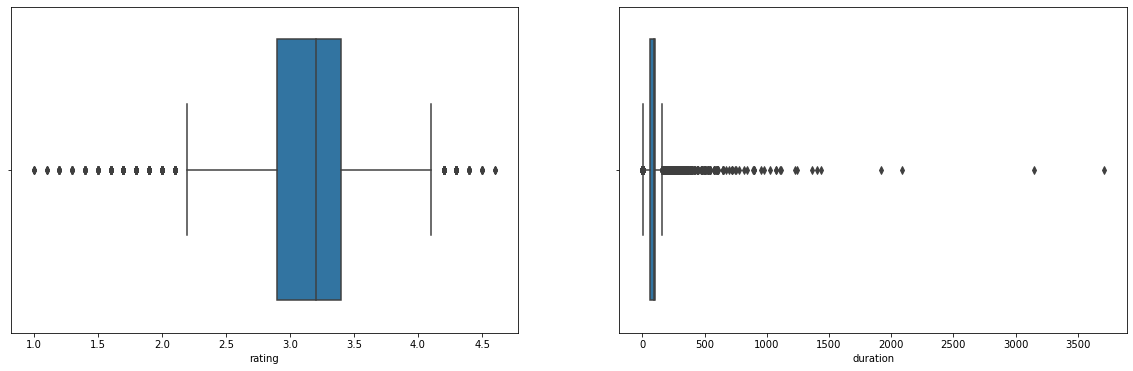

In [42]:
fig = plt.figure(figsize=(20,6))
axis1 = fig.add_subplot(1,2,1)
axis2 = fig.add_subplot(1,2,2)
sns.boxplot(x = "rating", data=df, ax=axis1)
sns.boxplot(x = "duration", data=df, ax=axis2)
plt.show()

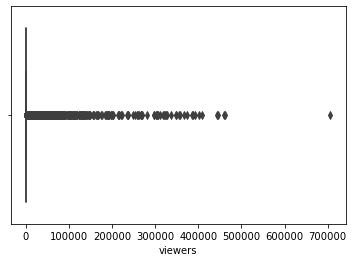

In [43]:
sns.boxplot(x = "viewers", data=df)
plt.show()

In [44]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers',
       'thriller', 'tv movie', 'mystery', 'documentary', 'western', 'family',
       'horror', 'drama', 'fantasy', 'action', 'music', 'history', 'comedy',
       'science fiction', 'romance', 'crime', 'animation', 'war', 'adventure'],
      dtype='object')

In [45]:
df.columns[0:7]

Index(['title', 'year', 'duration', 'genre', 'rating', 'language', 'viewers'], dtype='object')

In [46]:
df.columns[7:]

Index(['thriller', 'tv movie', 'mystery', 'documentary', 'western', 'family',
       'horror', 'drama', 'fantasy', 'action', 'music', 'history', 'comedy',
       'science fiction', 'romance', 'crime', 'animation', 'war', 'adventure'],
      dtype='object')

In [47]:
pd.melt(df, id_vars = df.columns[0:7], value_vars=df.columns[7:])

title  year  duration                         genre  \
0                   Parasite  2019       133     [comedy, drama, thriller]   
1       Call Me by Your Name  2017       132              [drama, romance]   
2                 Hereditary  2018       127   [thriller, horror, mystery]   
3              Spirited Away  2001       125  [fantasy, animation, family]   
4                  Moonlight  2016       111                       [drama]   
...                      ...   ...       ...                           ...   
433062        Streets of Rio  2007        97                       [drama]   
433063       Whose Dominion?  2017        10        [history, documentary]   
433064               Lazania  2019        90                      [comedy]   
433065             Prisoners  2019       101                      [comedy]   
433066               Muraren  2002        95                            []   

        rating         language  viewers   variable  value  
0          4.6           Korean   705993   thriller      1  
1          4.1          English   355937   thriller      0  
2          4.0          English   365955   thriller      1  
3          4.5         Japanese   386917   thriller      0  
4          4.2          English   347384   thriller      0  
...        ...              ...      ...        ...    ...  
433062     3.1          English       30  adventure      0  
433063     2.9          English       41  adventure      0  
433064     2.4  Persian (Farsi)       33  adventure      0  
433065     2.5  Persian (Farsi)       30  adventure      0  
433066     3.5          English       33  adventure      0  

[433067 rows x 9 columns]

In [48]:
df_pivot = pd.melt(df, id_vars = df.columns[0:7], value_vars=df.columns[7:])

In [49]:
df_pivot

title  year  duration                         genre  \
0                   Parasite  2019       133     [comedy, drama, thriller]   
1       Call Me by Your Name  2017       132              [drama, romance]   
2                 Hereditary  2018       127   [thriller, horror, mystery]   
3              Spirited Away  2001       125  [fantasy, animation, family]   
4                  Moonlight  2016       111                       [drama]   
...                      ...   ...       ...                           ...   
433062        Streets of Rio  2007        97                       [drama]   
433063       Whose Dominion?  2017        10        [history, documentary]   
433064               Lazania  2019        90                      [comedy]   
433065             Prisoners  2019       101                      [comedy]   
433066               Muraren  2002        95                            []   

        rating         language  viewers   variable  value  
0          4.6           Korean   705993   thriller      1  
1          4.1          English   355937   thriller      0  
2          4.0          English   365955   thriller      1  
3          4.5         Japanese   386917   thriller      0  
4          4.2          English   347384   thriller      0  
...        ...              ...      ...        ...    ...  
433062     3.1          English       30  adventure      0  
433063     2.9          English       41  adventure      0  
433064     2.4  Persian (Farsi)       33  adventure      0  
433065     2.5  Persian (Farsi)       30  adventure      0  
433066     3.5          English       33  adventure      0  

[433067 rows x 9 columns]

In [50]:
df_pivot = df_pivot.loc[df_pivot.value==1]

In [51]:
df_pivot.head()

title  year  duration                               genre  \
0         Parasite  2019       133           [comedy, drama, thriller]   
2       Hereditary  2018       127         [thriller, horror, mystery]   
7             1917  2019       119      [thriller, war, drama, action]   
8        Gone Girl  2014       149          [drama, thriller, mystery]   
10  The Lighthouse  2019       109  [thriller, fantasy, drama, horror]   

    rating language  viewers  variable  value  
0      4.6   Korean   705993  thriller      1  
2      4.0  English   365955  thriller      1  
7      4.1  English   358009  thriller      1  
8      4.0  English   445648  thriller      1  
10     4.1  English   304207  thriller      1

In [52]:
df_pivot.shape

(39384, 9)

In [53]:
df_pivot.loc[df_pivot.title=="Soul"]

title  year  duration  \
113982  Soul  2020       102   
159568  Soul  2020       102   
182361  Soul  2020       102   
227947  Soul  2020       102   
273533  Soul  2020       102   
364705  Soul  2020       102   

                                                    genre  rating language  \
113982  [family, drama, music, comedy, animation, fant...     4.1  English   
159568  [family, drama, music, comedy, animation, fant...     4.1  English   
182361  [family, drama, music, comedy, animation, fant...     4.1  English   
227947  [family, drama, music, comedy, animation, fant...     4.1  English   
273533  [family, drama, music, comedy, animation, fant...     4.1  English   
364705  [family, drama, music, comedy, animation, fant...     4.1  English   

        viewers   variable  value  
113982   281921     family      1  
159568   281921      drama      1  
182361   281921    fantasy      1  
227947   281921      music      1  
273533   281921     comedy      1  
364705   281921  animation      1

In [54]:
df_pivot.drop(["genre", "value"], axis=1, inplace=True)

In [55]:
df_pivot.head()

title  year  duration  rating language  viewers  variable
0         Parasite  2019       133     4.6   Korean   705993  thriller
2       Hereditary  2018       127     4.0  English   365955  thriller
7             1917  2019       119     4.1  English   358009  thriller
8        Gone Girl  2014       149     4.0  English   445648  thriller
10  The Lighthouse  2019       109     4.1  English   304207  thriller

In [56]:
df_pivot.rename(columns={"variable": "genre"}, inplace=True)

In [57]:
df = df_pivot

In [131]:
def annotate_graph_both(ax):
    total_height = 0
    for bar in ax.patches:
        total_height=total_height+bar.get_height()
        
#     for bar in ax.patches: 
#         ax.annotate(format((bar.get_height()/total_height )* 100, '.1f')+" %",  
#                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()/2), 
#                    ha='center', va='center', 
#                    size=10, xytext=(0, 8), 
#                    textcoords='offset points')
        
    for bar in ax.patches: 
        ax.annotate(format((bar.get_height()), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  bar.get_height()), 
                   ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points')
    return ax

In [132]:
grouped_rating_median = df.loc[:,['genre', 'rating']].groupby(['genre']).median().sort_values(by='rating')
grouped_rating_median = pd.DataFrame(grouped_rating_median)
grouped_rating_median = grouped_rating_median.reset_index()
grouped_rating_median

genre  rating
0            horror     2.8
1          thriller     2.9
2   science fiction     2.9
3            action     3.0
4         adventure     3.0
5          tv movie     3.0
6           romance     3.1
7           mystery     3.1
8           western     3.1
9            family     3.1
10            crime     3.1
11           comedy     3.1
12          fantasy     3.1
13              war     3.2
14            drama     3.2
15        animation     3.3
16          history     3.3
17            music     3.4
18      documentary     3.4

In [133]:
grouped_rating_mean = df.loc[:,['genre', 'rating']].groupby(['genre']).mean().sort_values(by='rating')
grouped_rating_mean = pd.DataFrame(grouped_rating_mean)
grouped_rating_mean = grouped_rating_mean.reset_index()
grouped_rating_mean

genre    rating
0            horror  2.800131
1   science fiction  2.889947
2          thriller  2.918565
3            action  2.938684
4         adventure  2.986467
5            family  2.991188
6          tv movie  3.015921
7           fantasy  3.041466
8           mystery  3.053564
9            comedy  3.057474
10          romance  3.078985
11            crime  3.104104
12          western  3.125157
13            drama  3.192025
14              war  3.228829
15        animation  3.239053
16          history  3.295238
17            music  3.354450
18      documentary  3.410717

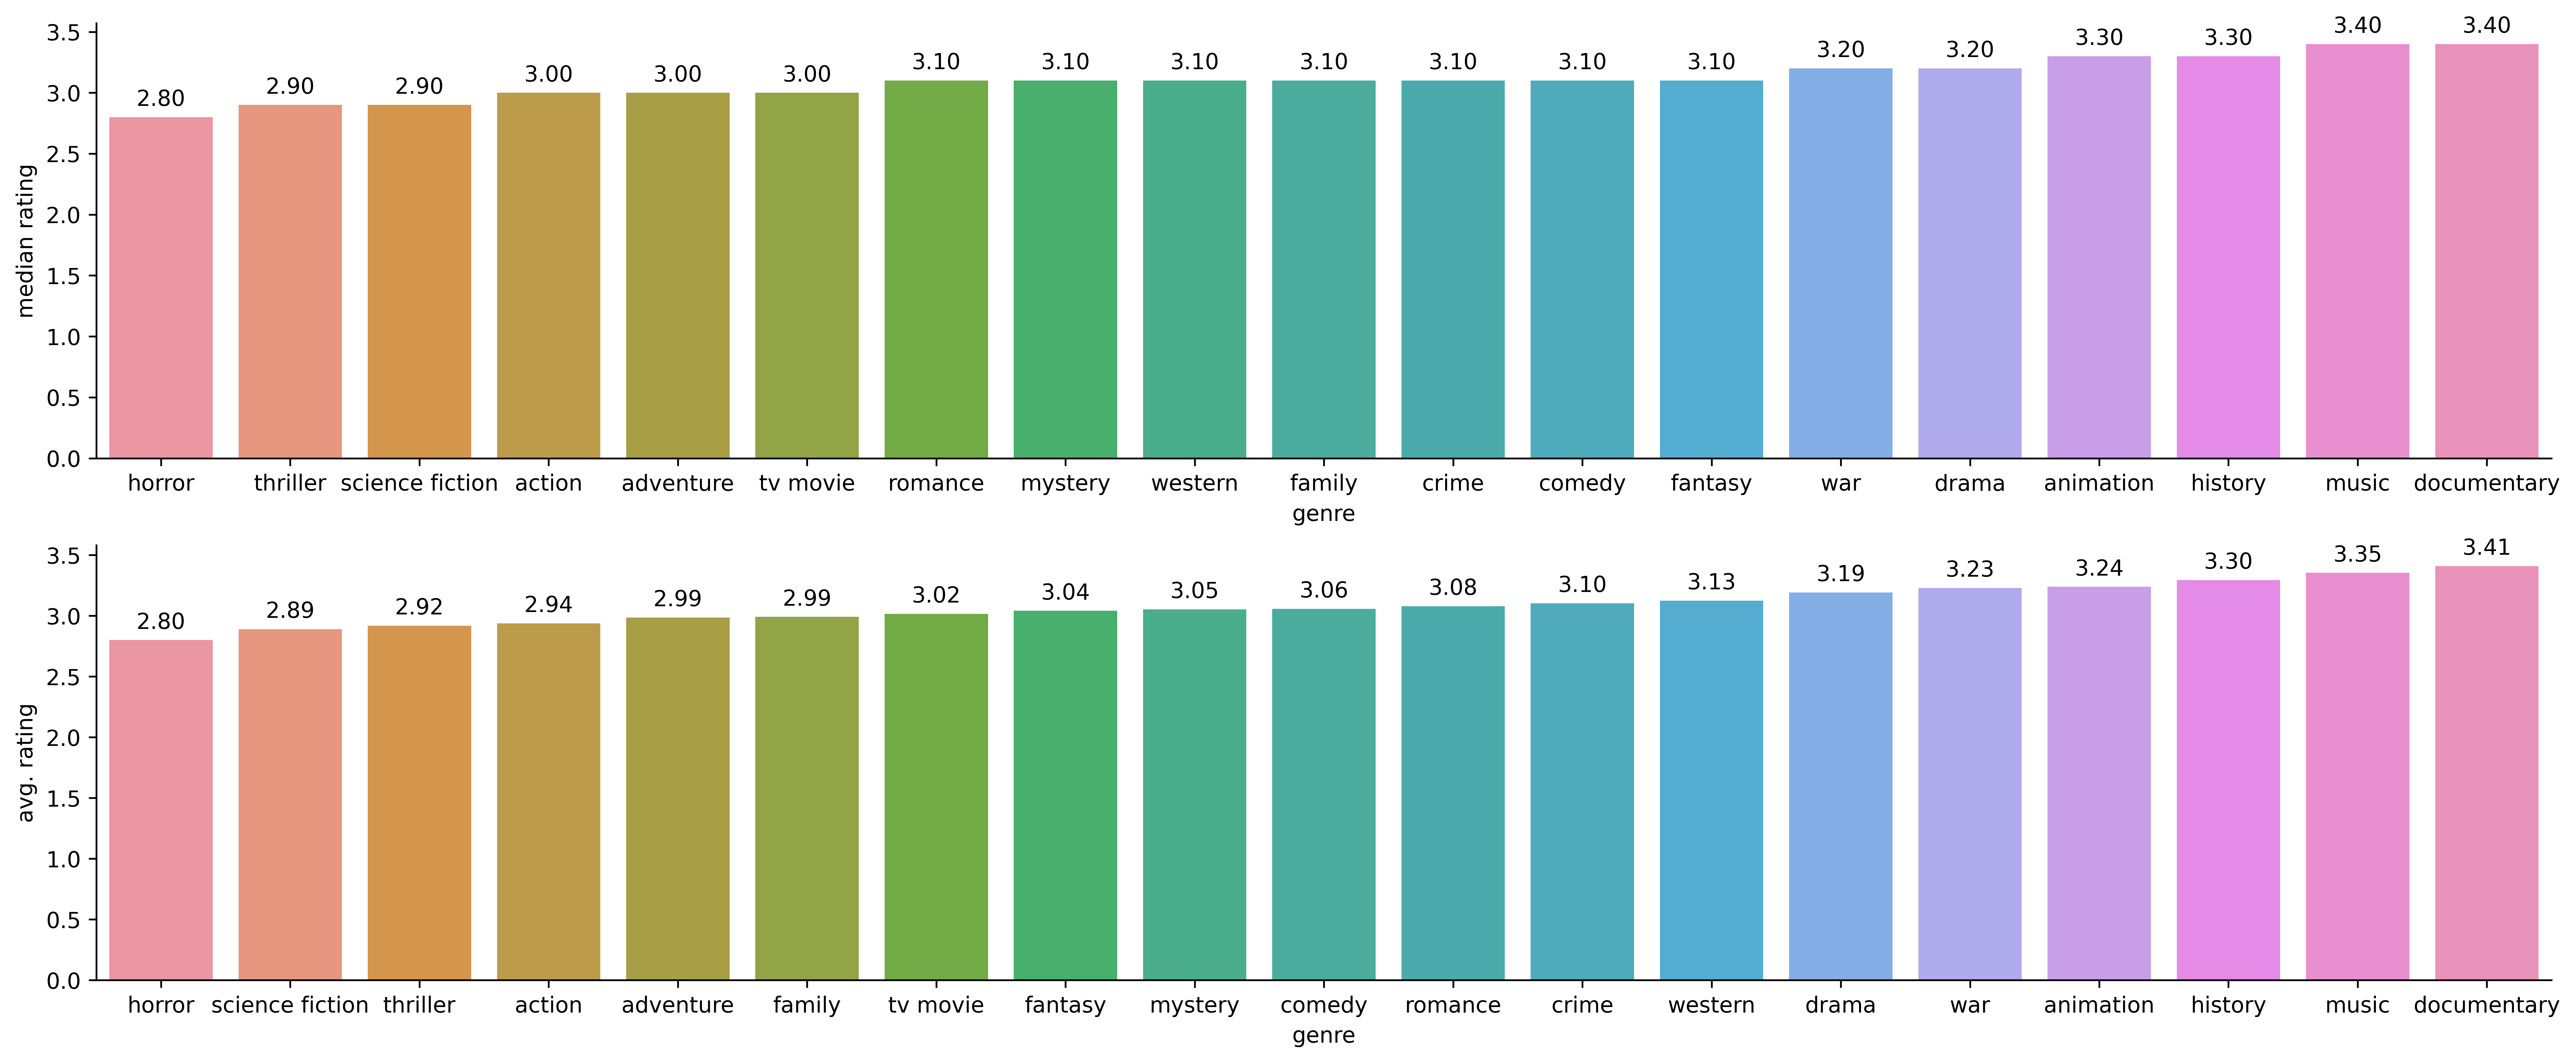

In [134]:
fig = plt.figure(figsize=(20,8), dpi=600)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.despine()
fig1=sns.barplot(x="genre",y="rating",data=grouped_rating_median, order=grouped_rating_median.genre, ax=ax1)
annotate_graph_both(fig1)
fig1.set_ylabel("median rating")

sns.despine()
fig2=sns.barplot(x="genre",y="rating",data=grouped_rating_mean, order=grouped_rating_mean.genre, ax=ax2)
annotate_graph_both(fig2)
fig2.set_ylabel("avg. rating")
plt.show()

# OBSERVATION

COMEDY IS HEAVILY AFFECTED BY OUTLIERS

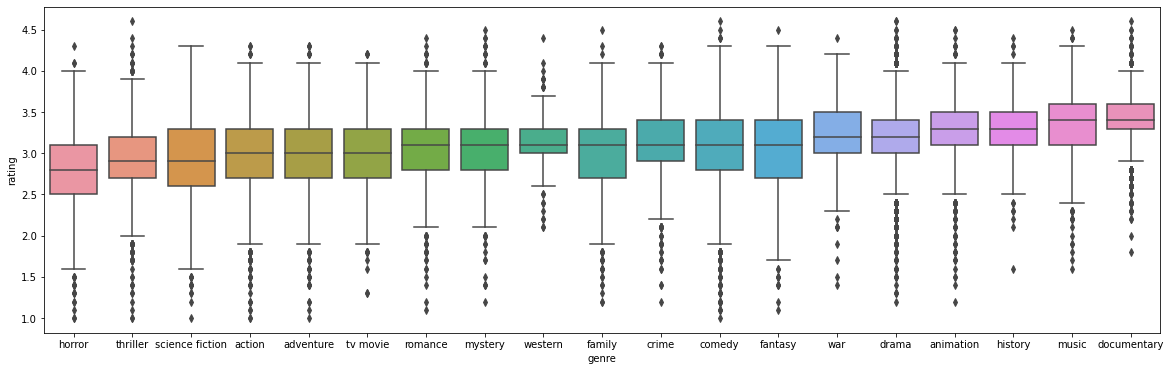

In [143]:

fig = plt.figure(figsize=(20,6))
sns.boxplot(x = "genre", y="rating" ,data=df, order=grouped.index)
plt.show()

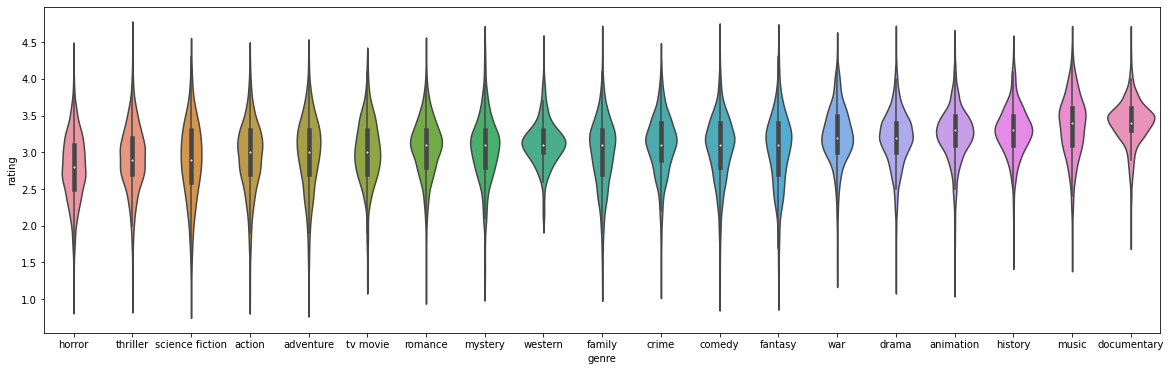

In [90]:
fig = plt.figure(figsize=(20,6))
sns.violinplot(x = "genre", y="rating" ,data=df, order=grouped_rating_median.index)
plt.show()

In [139]:
#--------------------------------------------- DURATOIN -------------------------------------------------#

In [136]:
grouped_duration_median = df.loc[:,['genre', 'duration']].groupby(['genre']).median().sort_values(by='duration')
grouped_duration_median = pd.DataFrame(grouped_duration_median)
grouped_duration_median = grouped_duration_median.reset_index()
grouped_duration_median

genre  duration
0         animation        11
1       documentary        78
2            horror        88
3          tv movie        89
4            family        89
5           fantasy        89
6   science fiction        89
7            comedy        91
8             music        92
9           western        93
10          mystery        93
11        adventure        94
12            crime        95
13         thriller        95
14           action        96
15            drama        97
16          romance        99
17              war       102
18          history       106

In [137]:
grouped_duration_mean = df.loc[:,['genre', 'duration']].groupby(['genre']).mean().sort_values(by='duration')
grouped_duration_mean = pd.DataFrame(grouped_duration_mean)
grouped_duration_mean = grouped_duration_mean.reset_index()
grouped_duration_mean

genre    duration
0         animation   49.370629
1       documentary   76.599204
2           fantasy   77.324976
3            horror   79.642826
4            family   80.514555
5   science fiction   81.720459
6            comedy   85.384798
7          tv movie   88.597368
8           western   89.503145
9             music   90.194379
10        adventure   94.015736
11         thriller   96.223235
12          mystery   99.488470
13          romance   99.847783
14           action  100.359537
15            drama  101.025998
16            crime  101.373134
17              war  103.414414
18          history  112.403880

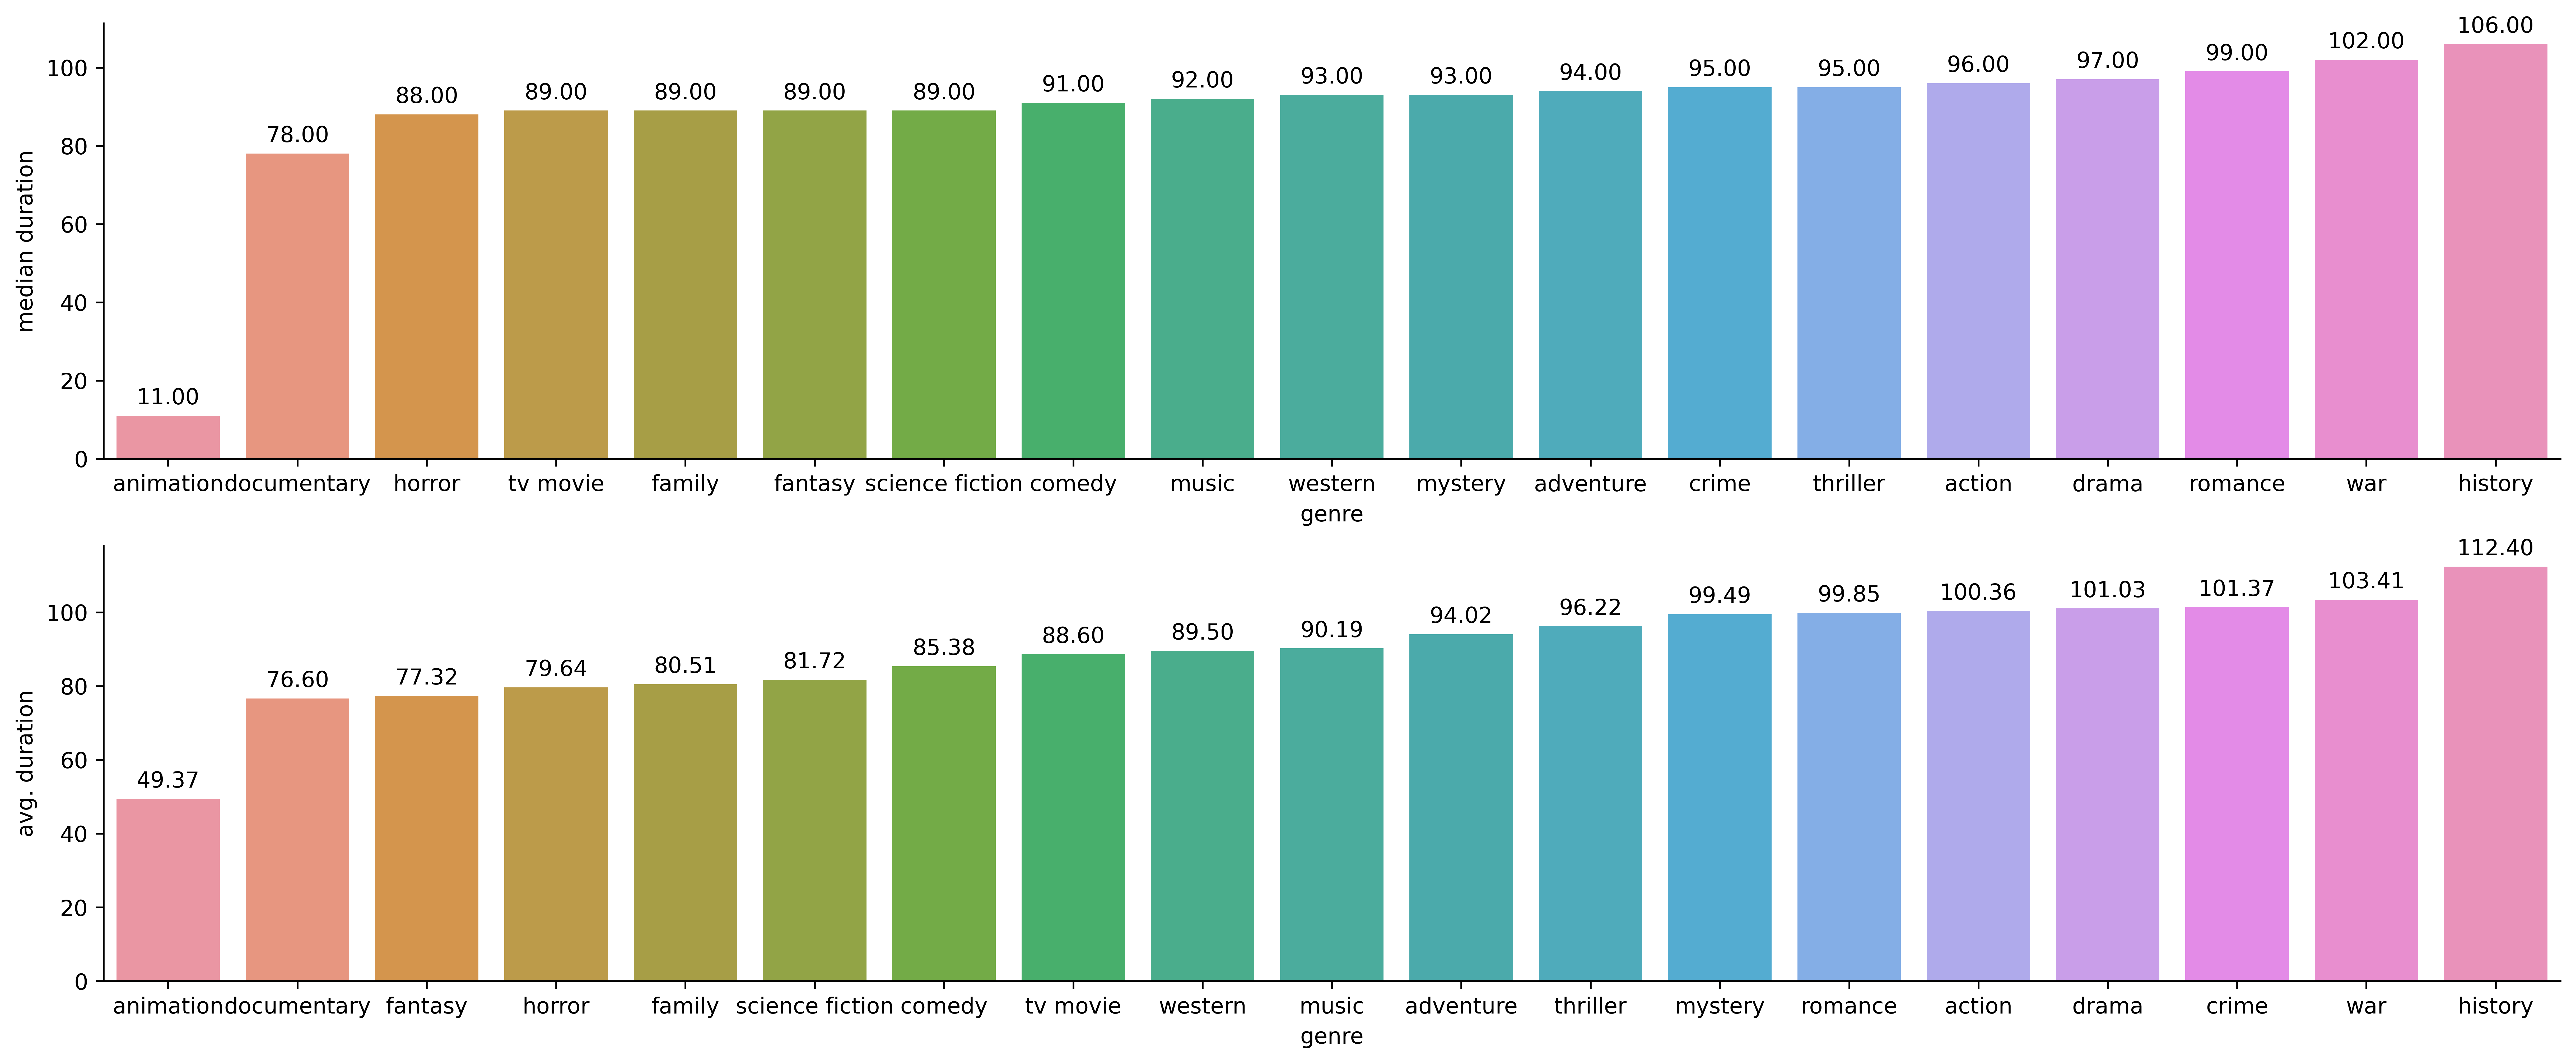

In [138]:
fig = plt.figure(figsize=(20,8), dpi=600)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.despine()
fig1=sns.barplot(x="genre",y="duration",data=grouped_duration_median, order=grouped_duration_median.genre, ax=ax1)
annotate_graph_both(fig1)
fig1.set_ylabel("median duration")

sns.despine()
fig2=sns.barplot(x="genre",y="duration",data=grouped_duration_mean, order=grouped_duration_mean.genre, ax=ax2)
annotate_graph_both(fig2)
fig2.set_ylabel("avg. duration")
plt.show()

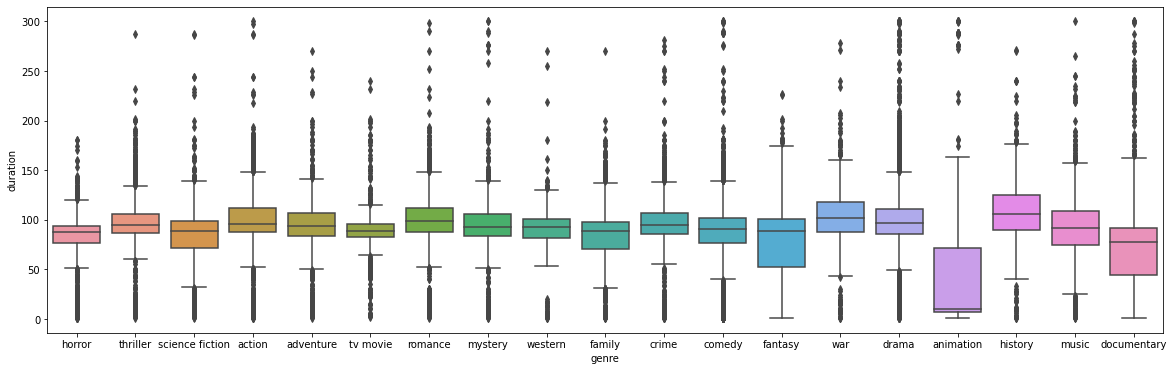

In [153]:
fig = plt.figure(figsize=(20,6))
sns.boxplot(x = "genre", y="duration" ,data=df.loc[~(df.duration>300)], order=grouped_rating_median.genre)
plt.show()

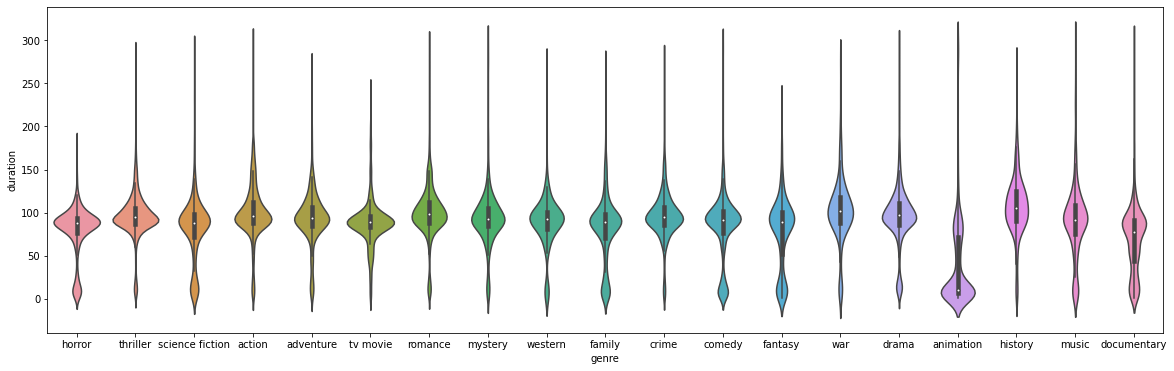

In [152]:
fig = plt.figure(figsize=(20,6))
sns.violinplot(x = "genre", y="duration" ,data=df.loc[~(df.duration>300)], order=grouped_rating_median.genre)
plt.show()

In [67]:
df.columns

Index(['title', 'year', 'duration', 'rating', 'language', 'viewers', 'genre'], dtype='object')

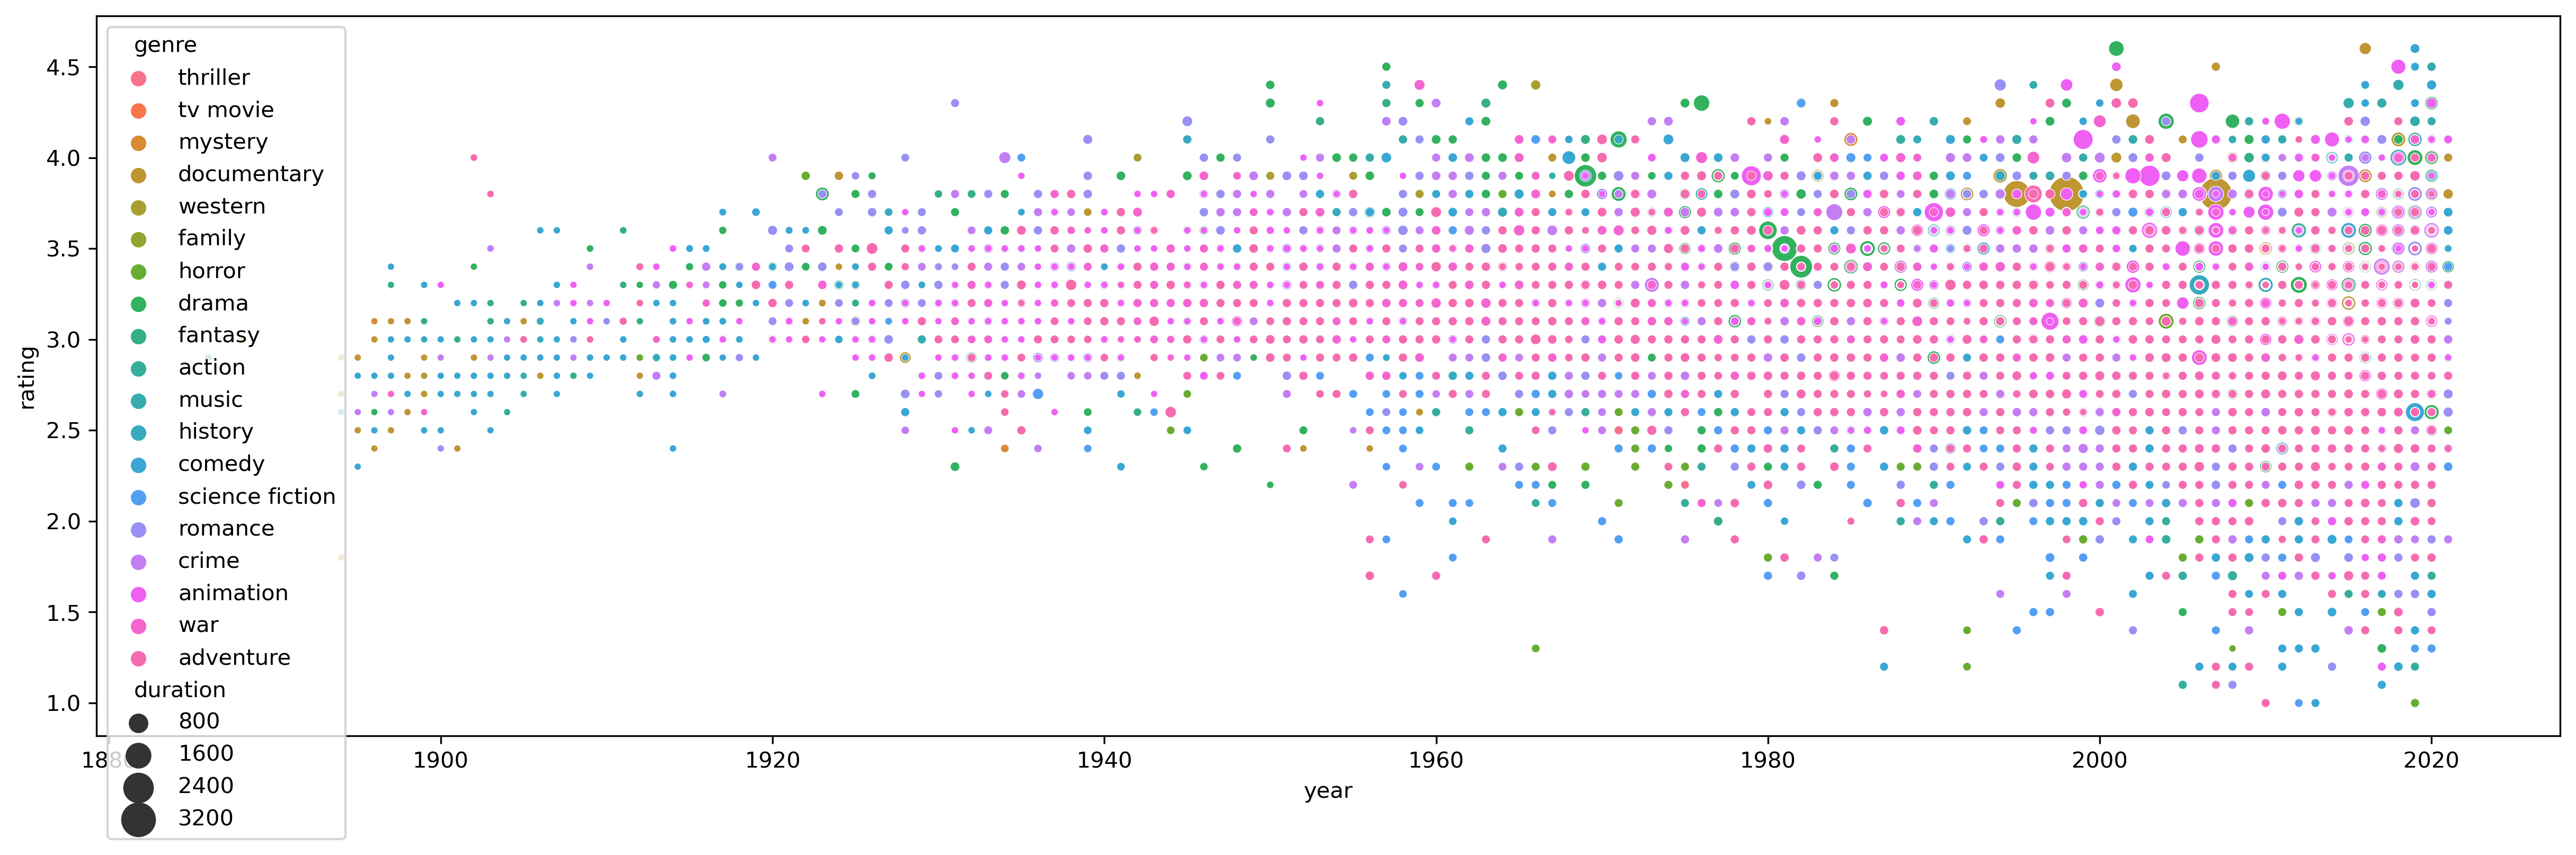

In [159]:
fig = plt.figure(figsize=(20,6), dpi=300)
# axis1 = fig.add_subplot(1,2,1)
# axis2 = fig.add_subplot(1,2,2)
sns.scatterplot(hue = "genre", y="rating",x="year", size="duration",data=df, sizes=(10,250))
# sns.boxplot(x = "duration", data=df, ax=axis2)
plt.show()

In [160]:
#----------------------------------------------------------------------------------------------------------------#

In [165]:
grouped_viewers_mean = df.loc[:,['genre', 'viewers']].groupby(['genre']).mean().sort_values(by='viewers')
grouped_viewers_mean = pd.DataFrame(grouped_viewers_mean)
grouped_viewers_mean = grouped_viewers_mean.reset_index()
grouped_viewers_mean

genre       viewers
0       documentary    378.595886
1          tv movie    652.826316
2           western   1712.000000
3             music   2240.846604
4            horror   2624.518535
5            comedy   2695.007110
6             drama   3087.450755
7               war   3091.150901
8         animation   3097.246907
9           romance   3221.518977
10            crime   3540.656716
11          history   3729.504409
12         thriller   4492.473424
13           family   5471.936271
14          mystery   5710.663522
15           action   6085.403806
16          fantasy   7251.688525
17  science fiction   8458.423280
18        adventure  10093.222659

In [166]:

grouped_viewers_median = df.loc[:,['genre', 'viewers']].groupby(['genre']).median().sort_values(by='viewers')
grouped_viewers_median = pd.DataFrame(grouped_viewers_median)
grouped_viewers_median = grouped_viewers_median.reset_index()
grouped_viewers_median

genre  viewers
0       documentary     80.5
1             music     99.0
2          tv movie    101.0
3         animation    109.0
4           western    125.5
5             drama    127.0
6            comedy    129.0
7               war    142.0
8           romance    143.0
9           history    145.0
10           horror    146.0
11           family    153.0
12          mystery    157.5
13           action    165.0
14         thriller    166.5
15  science fiction    171.0
16            crime    171.5
17        adventure    179.0
18          fantasy    191.0

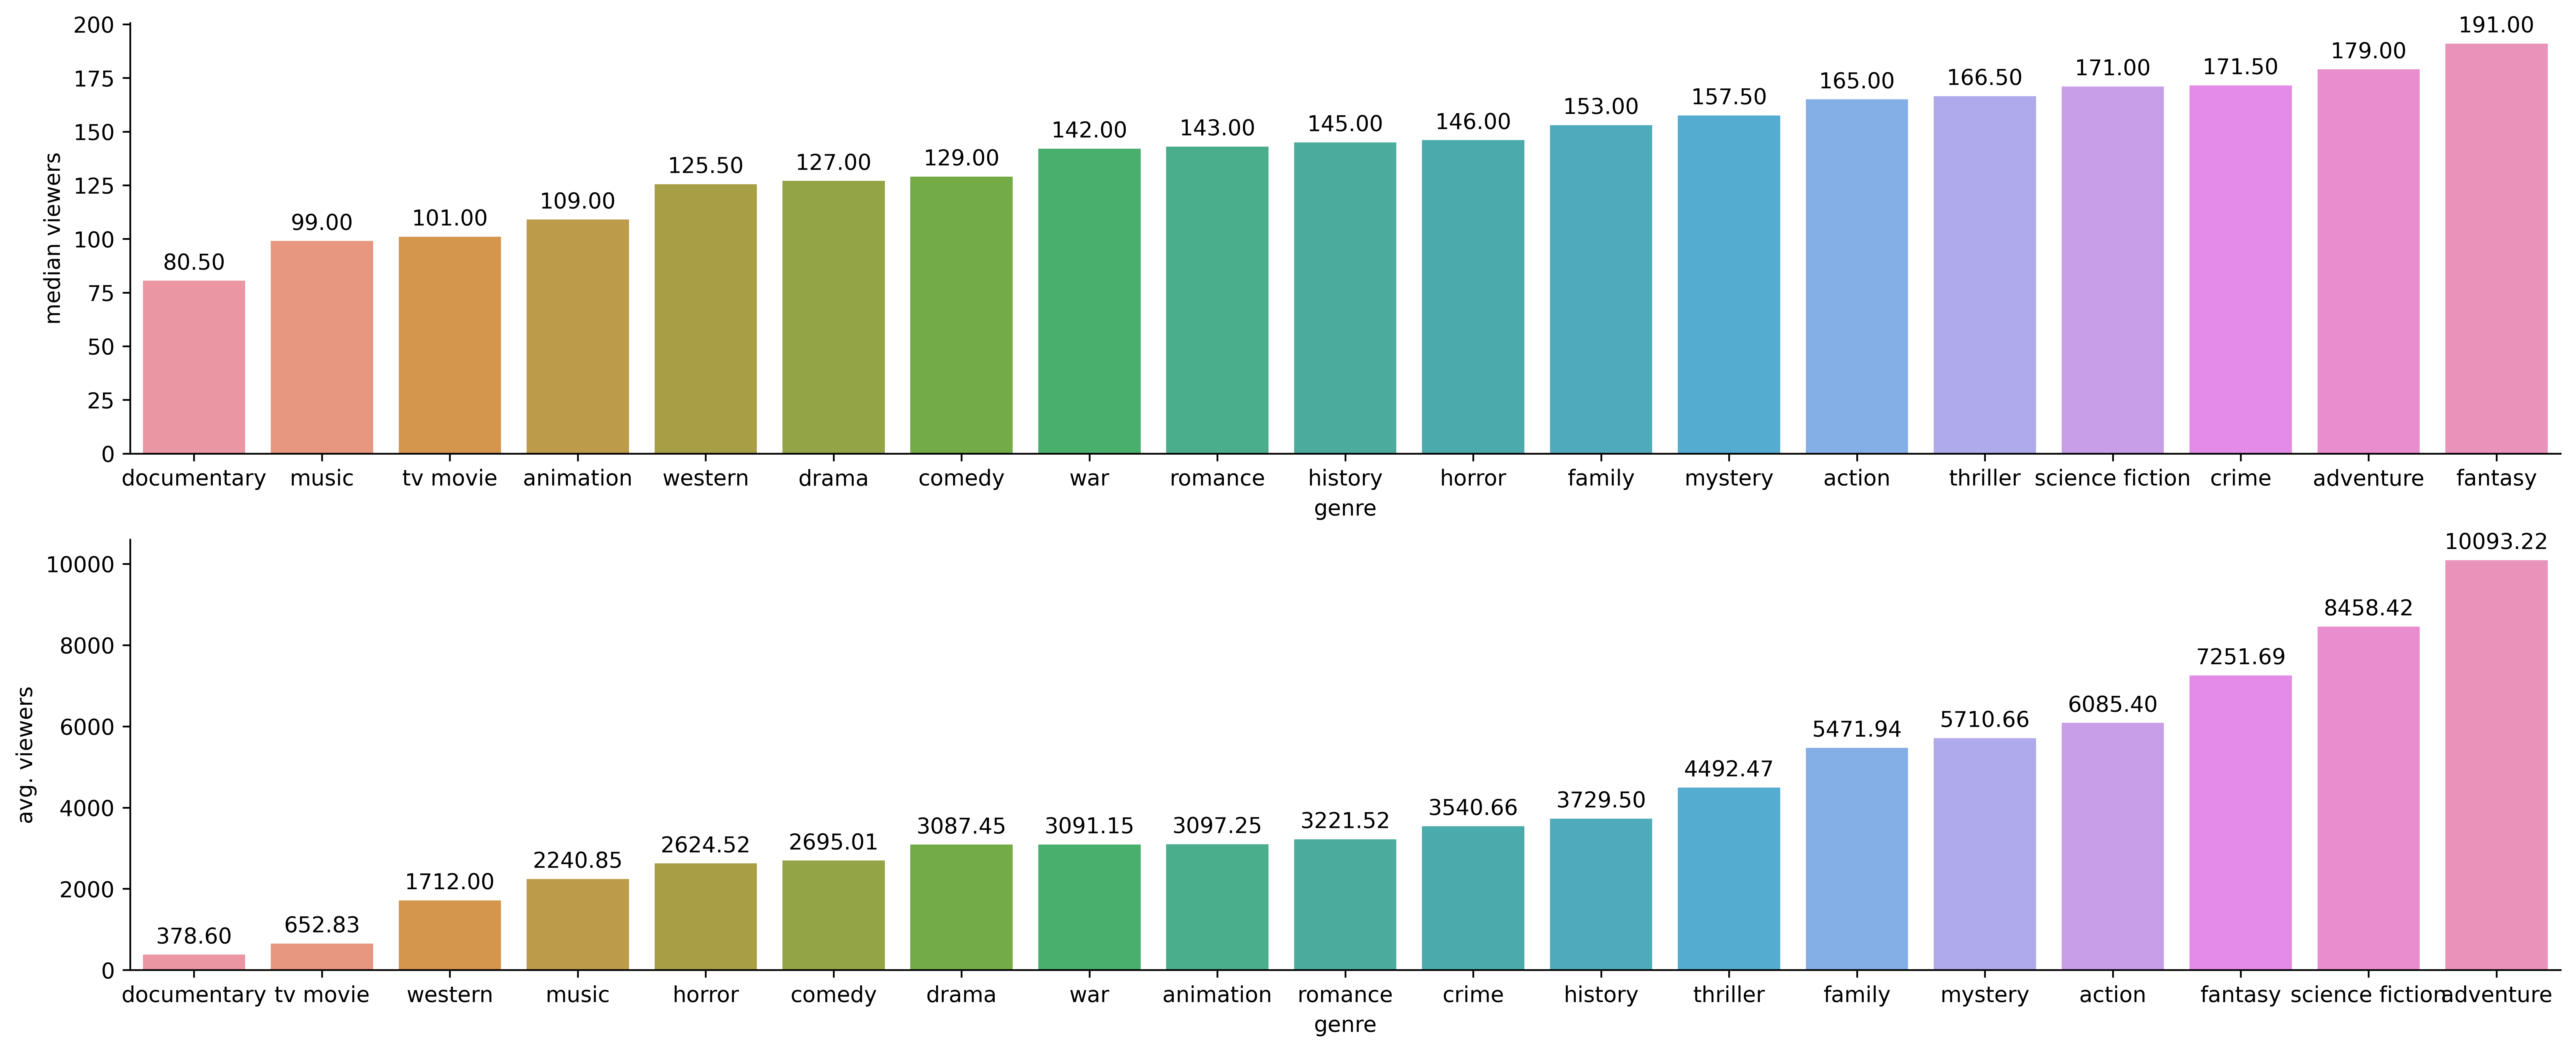

In [167]:
fig = plt.figure(figsize=(20,8), dpi=600)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.despine()
fig1=sns.barplot(x="genre",y="viewers",data=grouped_viewers_median, order=grouped_viewers_median.genre, ax=ax1)
annotate_graph_both(fig1)
fig1.set_ylabel("median viewers")

sns.despine()
fig2=sns.barplot(x="genre",y="viewers",data=grouped_viewers_mean, order=grouped_viewers_mean.genre, ax=ax2)
annotate_graph_both(fig2)
fig2.set_ylabel("avg. viewers")
plt.show()

# Observation

Documentries are highest rated but least viewed. Appraently, "documentries" enojoy an eclectic group who more often than not like what they see and rate it very highly. 